### Math 42, Homework 4
## Hector Lugo Barrios

In [4]:
import numpy as np
from numpy import random    
import matplotlib.pyplot as plt

## Demographic

Text(0, 0.5, 'Frequency of Occurence')

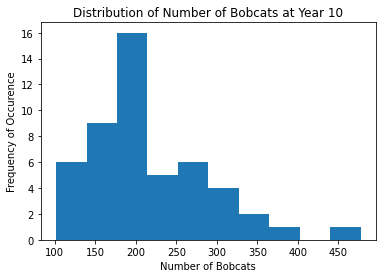

In [40]:
def run_recurrence1(f,x0,N_steps,*args):
    x0 = np.array(x0) # turning the initial condition into a numpy array to access the shape command
    X = np.empty((N_steps+1,*x0.shape)) # initializing X to have the correct size to store all iterations
    X[0] = x0 # loading the intial condition into the first element of X
    for i in range(1,N_steps+1):
        X[i]=f(i,X[i-1],*args) # looping through the recurrence relation
    return X

def stochastic_population_model(n,x,birth_mean,birth_sd,survival_mean,survival_sd):
    b = np.random.normal(birth_mean, birth_sd) # something with random.normal
    s = np.random.normal(survival_mean, survival_sd) # something with random.normal
    return (b+s)*x

x0 = 100
N_steps = 10
birth_mean = 0.4
birth_sd = 0.1
survival_mean = 0.68
survival_sd = 0.07
N_sims = 50
X_sims = np.empty(shape = (N_sims,N_steps+1))
xN_steps = list()
for i in range(N_sims):
    X = run_recurrence1(stochastic_population_model,x0,N_steps,birth_mean,birth_sd,survival_mean,survival_sd)
    X_sims[i,:] = X
    xN_steps.append(X[-1])


plt.hist(xN_steps, density = False)
plt.title(f"Distribution of Number of Bobcats at Year {N_steps}")
plt.xlabel(f"Number of Bobcats")
plt.ylabel(f"Frequency of Occurence")  

Text(0.5, 0, 'Time Step')

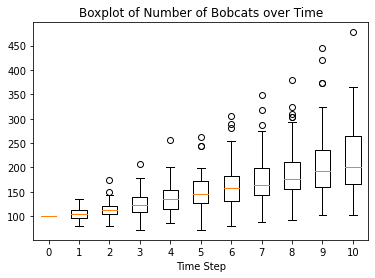

In [42]:
plt.boxplot(X_sims,labels = np.arange(N_steps+1))
plt.title(f"Boxplot of Number of Bobcats over Time")
plt.xlabel(f"Time Step")

## Environmental

Text(0, 0.5, 'Frequency of Occurence')

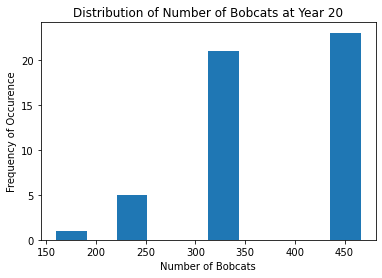

In [44]:
def run_recurrence2(f,x0,N_steps,*args):
    x0 = np.array(x0) # turning the initial condition into a numpy array to access the shape command
    X = np.empty((N_steps+1,*x0.shape)) # initializing X to have the correct size to store all iterations
    X[0] = x0 # loading the intial condition into the first element of X
    for i in range(1,N_steps+1):
        X[i]=f(i,X[i-1],*args) # looping through the recurrence relation
    return X

def only_environment(n,x,birth_mean,birth_sd, survival_mean, survival_sd,catastrophe_chance):
    b = birth_mean
    s = survival_mean
    catastrophe = np.random.uniform()<catastrophe_chance
    if catastrophe:
        b = 0.7*b
        s = 0.7*s
        return (b+s)*x
    return (b+s)*x

x0 = 100
N_steps = 20
birth_mean = 0.4
birth_sd = 0.1
survival_mean = 0.68
survival_sd = 0.07
N_sims = 50
X_sims = np.empty(shape = (N_sims,N_steps+1))
xN_steps = list()
catastrophe_chance = 0.04
for i in range(N_sims):
    X = run_recurrence2(only_environment,x0,N_steps,birth_mean,birth_sd,survival_mean,survival_sd,catastrophe_chance)
    X_sims[i,:] = X
    xN_steps.append(X[-1])


plt.hist(xN_steps, density = False)
plt.title(f"Distribution of Number of Bobcats at Year {N_steps}")
plt.xlabel(f"Number of Bobcats")
plt.ylabel(f"Frequency of Occurence") 


Text(0.5, 0, 'Time Step')

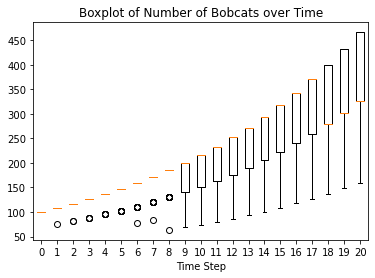

In [45]:
plt.boxplot(X_sims,labels = np.arange(N_steps+1))
plt.title(f"Boxplot of Number of Bobcats over Time")
plt.xlabel(f"Time Step")